In [1]:
###################################################
# Author: Fernando Cardoso e Sandro Camargo
# Course: Biostatistics
# Federal University of Pampa - Bagé - PPGCAP
#
# Example 1 - Feed protein x Milk production
# One-way Regression ANOVA (no repetition)
###################################################

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [8]:
# --- Read data ---
dados = pd.read_csv("https://raw.githubusercontent.com/Sandrocamargo/biostatistics/refs/heads/master/datasets/rl-leite.txt", sep="\t", decimal=",", header=0)
dados.info()
dados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prot    10 non-null     int64  
 1   y       10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes


,prot,y
0,10,11.8
1,12,12.0
2,14,12.1
3,16,13.2
4,18,14.1


In [9]:
# --- Fit linear model ---
modelo = smf.ols("y ~ prot", data=dados).fit()

# --- Summary (t-tests, coefficients, R²) ---
print("\nResumo do modelo:")
print(modelo.summary())


Resumo do modelo:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     354.1
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           6.57e-08
Time:                        14:05:11   Log-Likelihood:                -1.2312
No. Observations:                  10   AIC:                             6.462
Df Residuals:                       8   BIC:                             7.068
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2376      0.334 

In [10]:
# --- ANOVA table ---
anova_table = sm.stats.anova_lm(modelo, typ=2)
print("\nANOVA do modelo:")
print(anova_table)


ANOVA do modelo:
            sum_sq   df           F        PR(>F)
prot      33.15503  1.0  354.140152  6.570303e-08
Residual   0.74897  8.0         NaN           NaN


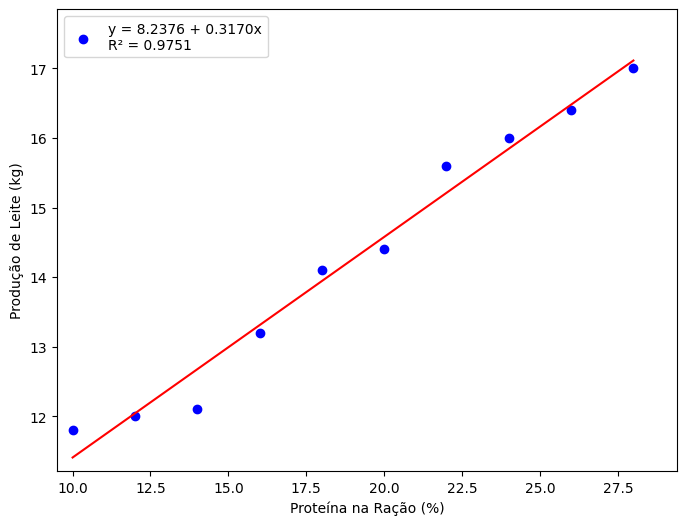

In [13]:
# --- Scatterplot with regression line ---
plt.figure(figsize=(8, 6))
plt.scatter(dados["prot"], dados["y"], color="blue", label="Observações")

# Regression line
x_vals = pd.Series(sorted(dados["prot"]))
#y_vals = modelo.params[0] + modelo.params[1] * x_vals
y_vals = modelo.params.iloc[0] + modelo.params.iloc[1] * x_vals
plt.plot(x_vals, y_vals, color="red", label="Ajuste linear")

# Axis limits similar to R version
plt.xlim(dados["prot"].min() * 0.95, dados["prot"].max() * 1.05)
plt.ylim(dados["y"].min() * 0.95, dados["y"].max() * 1.05)

# Labels
plt.xlabel("Proteína na Ração (%)")
plt.ylabel("Produção de Leite (kg)")

# Equation and R² in legend
#eq_text = f"y = {modelo.params[0]:.4f} + {modelo.params[1]:.4f}x\nR² = {modelo.rsquared_adj:.4f}"
eq_text = f"y = {modelo.params.iloc[0]:.4f} + {modelo.params.iloc[1]:.4f}x\nR² = {modelo.rsquared_adj:.4f}"
plt.legend([eq_text], loc="upper left")

# --- Save or show ---
plt.savefig("rl_leite_regressao.png", dpi=300, bbox_inches="tight")
plt.show()